In [3]:
import pandas as pd

In [4]:
data1 = pd.read_csv('crop_recommendation -2.csv')

In [5]:
data1.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data1.shape

(2200, 8)

In [8]:
data1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [9]:
data1.duplicated().sum()

0

In [10]:
#identifiying Garbage values
for i in data1.select_dtypes(include = 'object').columns:
    print(data1[i].value_counts())
    print("***"*10)

Crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
******************************


# DATA ANALYSIS

In [11]:
data1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
data1.describe(include = 'object')

,Crop
count,2200
unique,22
top,rice
freq,100


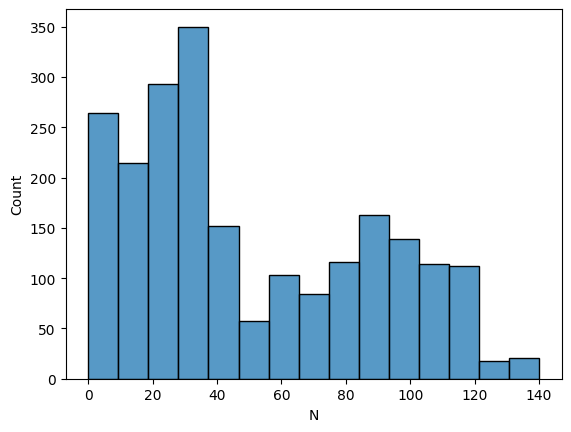

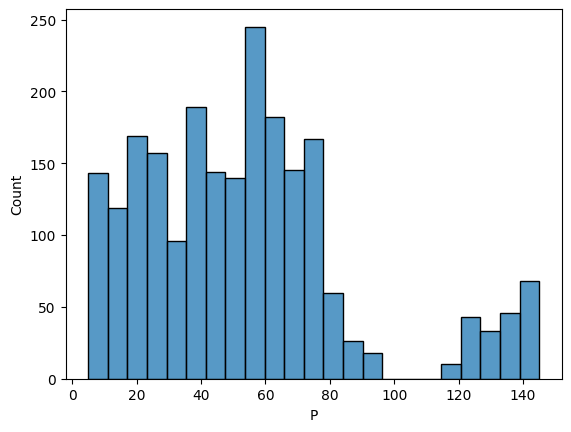

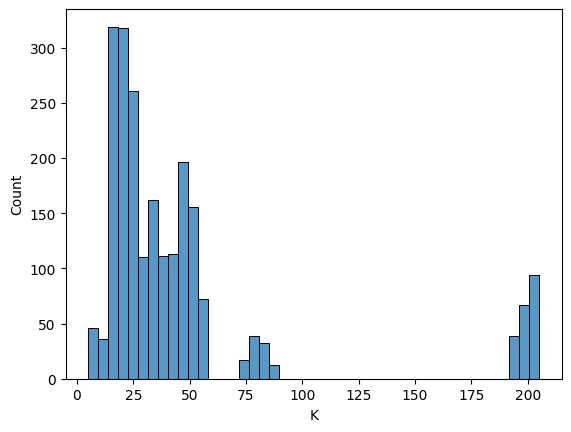

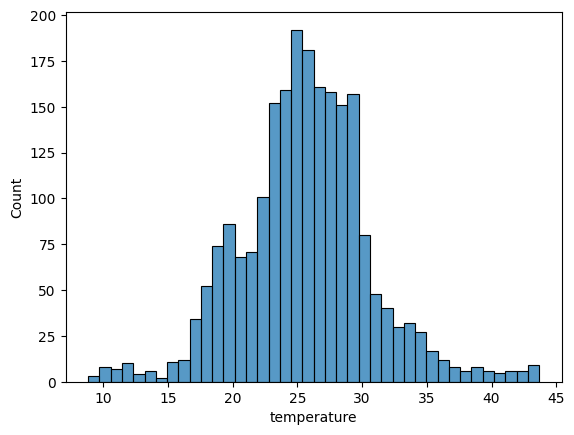

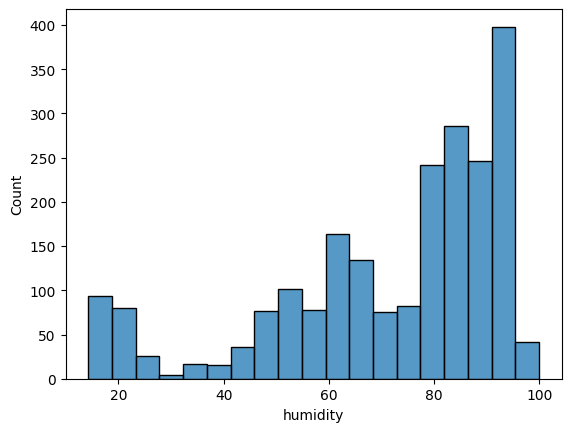

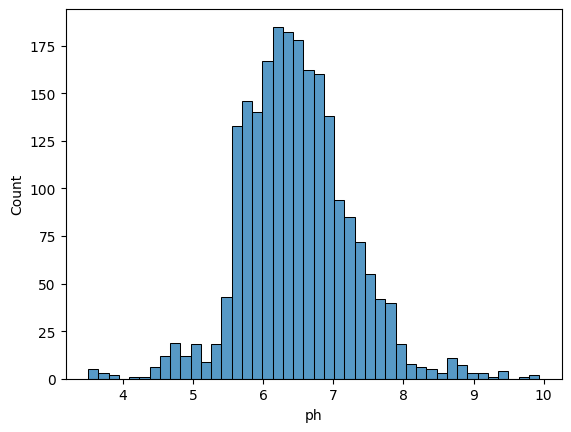

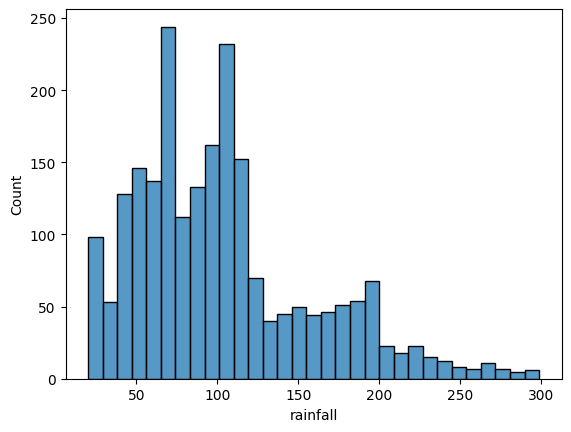

In [13]:
#histogram to understand the distribution
import seaborn as sns
from matplotlib import pyplot as plt
for i in data1.select_dtypes(include = ['number']).columns:
    sns.histplot(data = data1,x=i)
    plt.show()

In [14]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data1.select_dtypes(include=['number']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
data1_outliers = data1[outliers]
print(data1_outliers)

       N   P   K  temperature   humidity        ph    rainfall    Crop
6     69  55  38    22.708838  82.639414  5.700806  271.324860    rice
12    78  58  44    26.800796  80.886848  5.108682  284.436457    rice
16    85  38  41    21.587118  82.788371  6.249051  276.655246    rice
19    88  35  40    23.579436  83.587603  5.853932  291.298662    rice
26    97  59  43    26.359272  84.044036  6.286500  271.358614    rice
...   ..  ..  ..          ...        ...       ...         ...     ...
1758  40  49  47    42.933686  91.175675  6.501521  246.361327  papaya
1761  59  62  49    43.360515  93.351916  6.941497  114.778071  papaya
1766  63  58  50    43.037143  94.642890  6.720744   41.585659  papaya
1778  35  68  45    42.936054  90.094481  6.612430  234.846611  papaya
1797  35  67  49    41.313301  91.150880  6.617067  239.742755  papaya

[171 rows x 8 columns]


In [15]:
data1_outliers.shape

(171, 8)

In [16]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5 * iqr
    uw = q1 + 1.5 * iqr
    return lw,uw


In [17]:
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    lw,uw = whisker(data1[i])
    print(f'\t\t\tOutliers\n*****************************************************************************************')
    print(f'{i}-lower:{lw}\t\t{i}-upper:{uw}\n')

			Outliers
*****************************************************************************************
N-lower:-73.875		N-upper:115.875

			Outliers
*****************************************************************************************
P-lower:-32.0		P-upper:88.0

			Outliers
*****************************************************************************************
K-lower:-23.5		K-upper:63.5

			Outliers
*****************************************************************************************
temperature-lower:14.080955682499999		temperature-upper:31.457793582500003

			Outliers
*****************************************************************************************
humidity-lower:15.731725873750001		humidity-upper:104.79217973125

			Outliers
*****************************************************************************************
ph-lower:4.543768066249999		ph-upper:7.39961753225

			Outliers
*****************************************************************************************

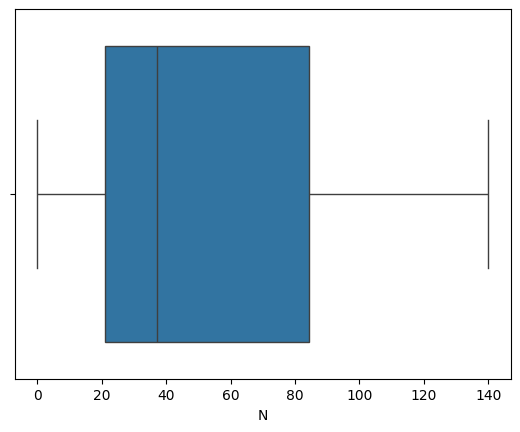

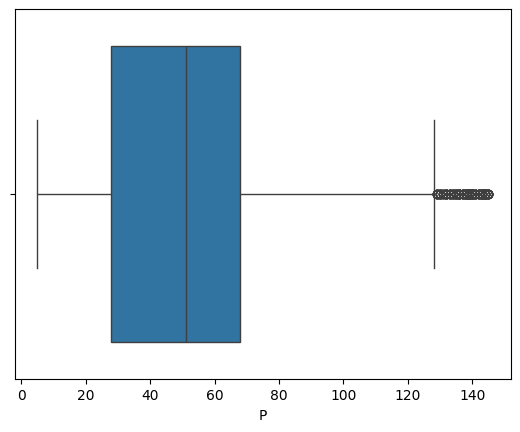

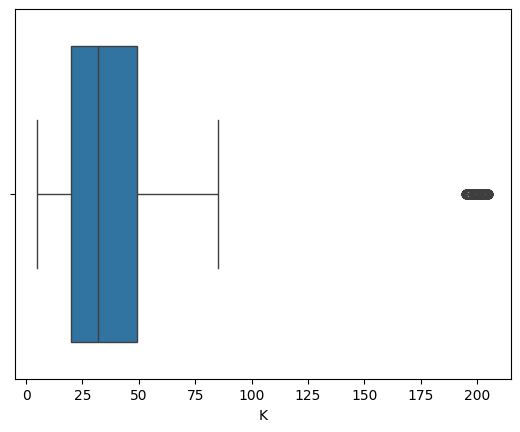

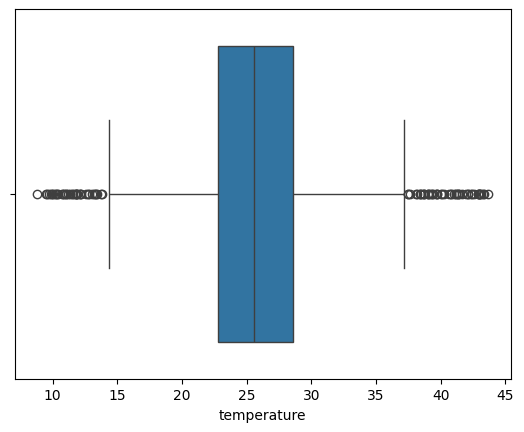

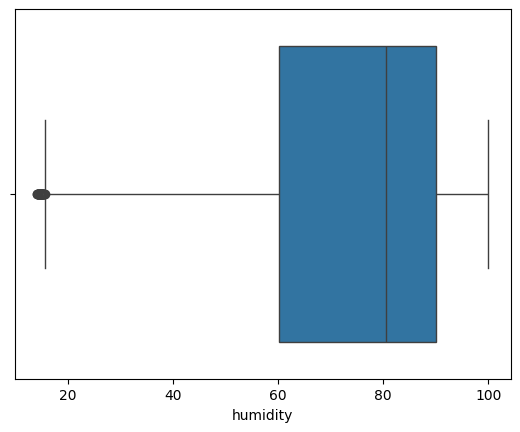

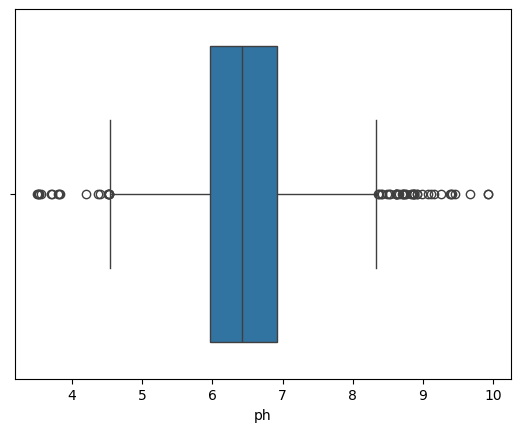

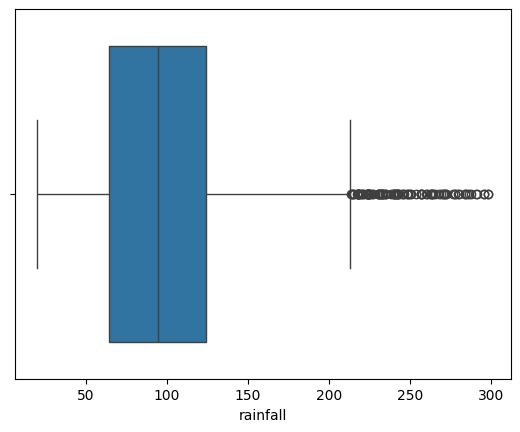

In [18]:
#box plot to identify the distribution and outliers
import seaborn as sns
from matplotlib import pyplot as plt
for i in data1.select_dtypes(include = ['number']).columns:
    sns.boxplot(data = data1,x=i)
    plt.show()

In [22]:
#scatter plot to understand the realationship between features and label
import seaborn as sns


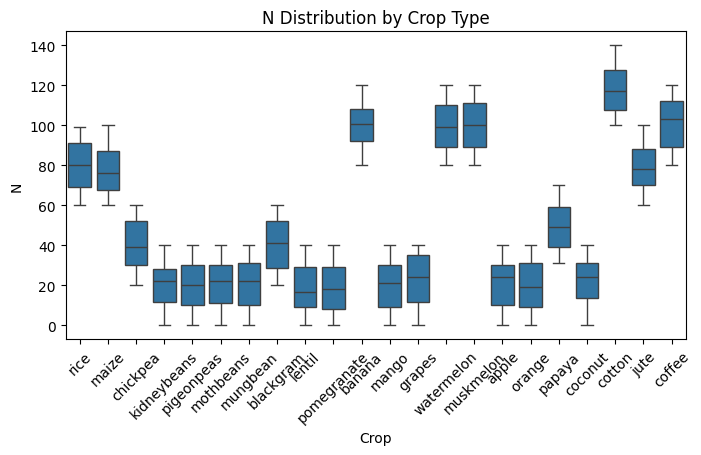

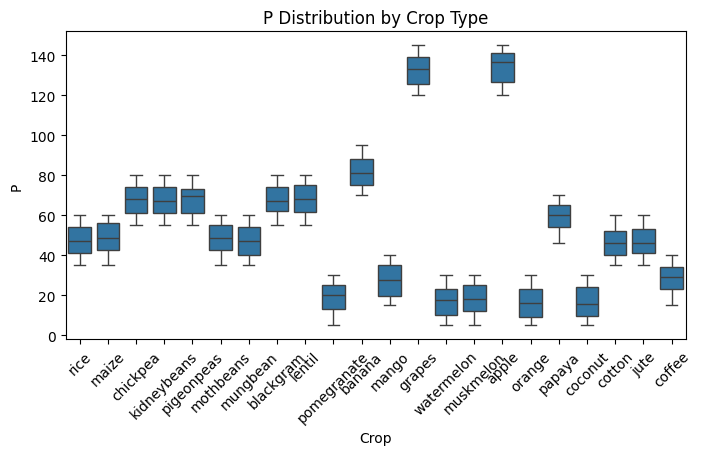

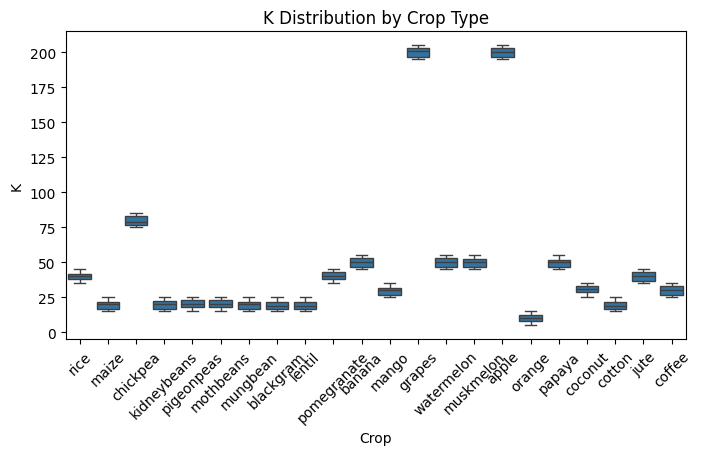

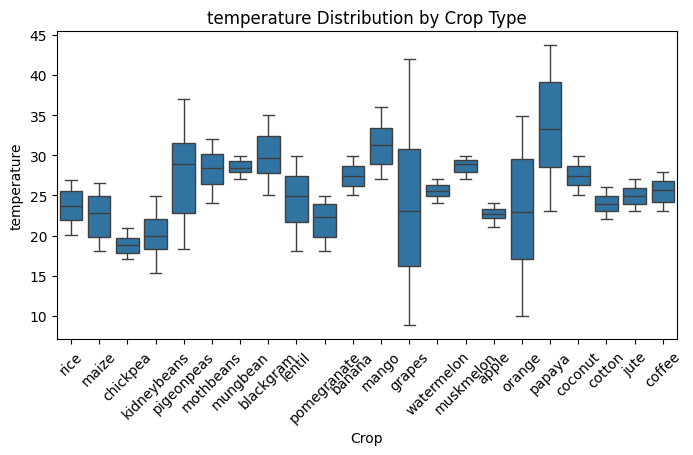

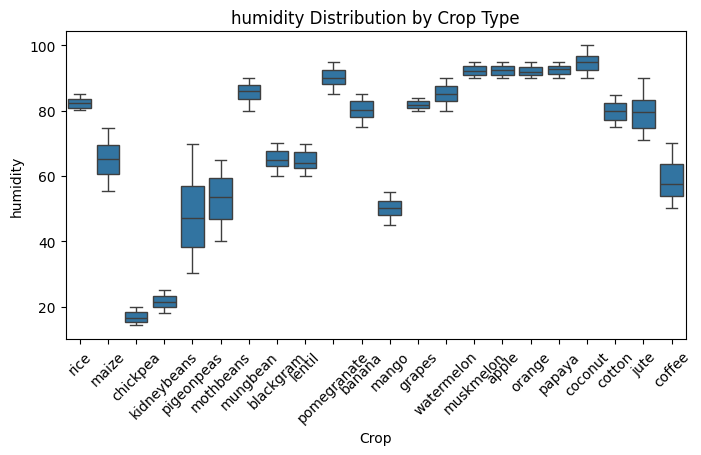

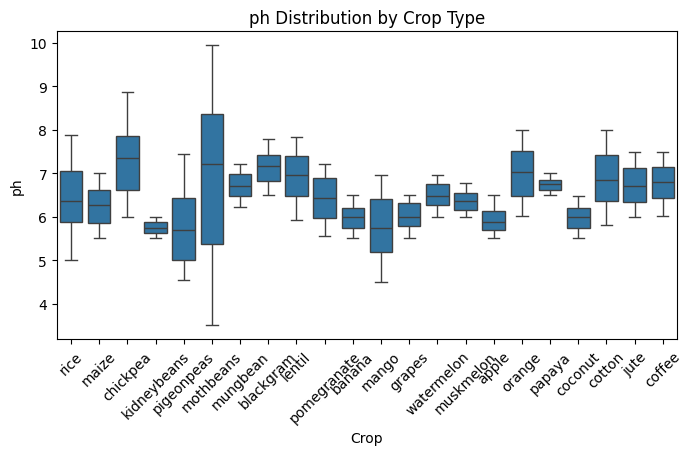

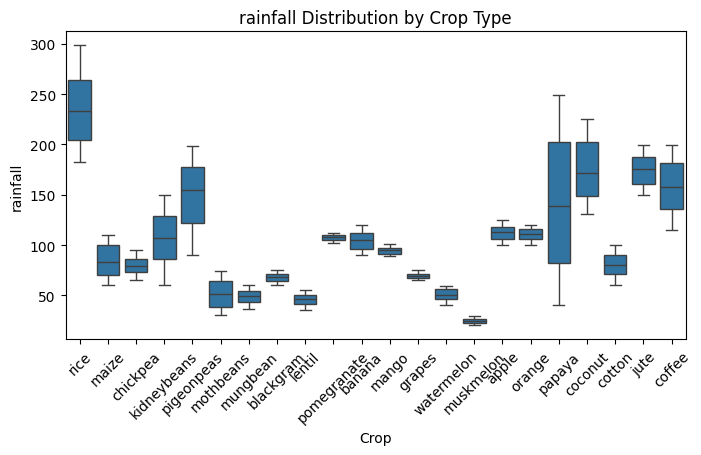

In [21]:
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Crop', y=col, data=data1)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

                  N       P       K  temperature   humidity        ph  \
Crop                                                                    
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44   19.79    22.389204  6

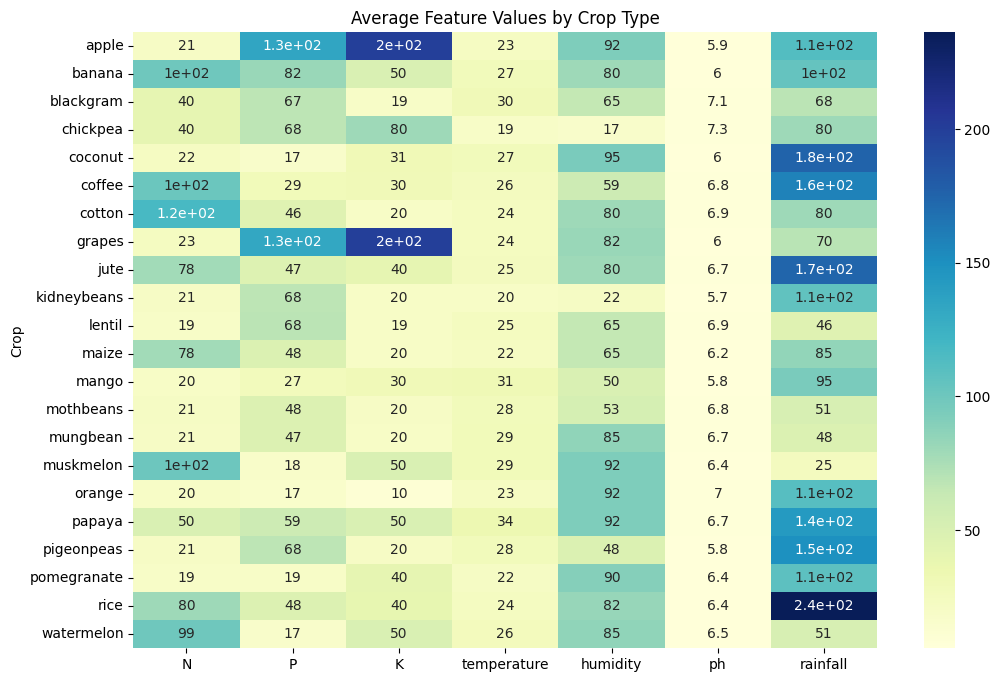

In [25]:
crop_mean = data1.groupby('Crop').mean()
print(crop_mean)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu')
plt.title('Average Feature Values by Crop Type')
plt.show()

In [23]:
#correlation with heatmap to interpret the relation and multicolliniarity
numeric_data = data1.select_dtypes(include=['number']) 

In [24]:
set1 = numeric_data.corr()
set1


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 1.0, 'correlation matrix')

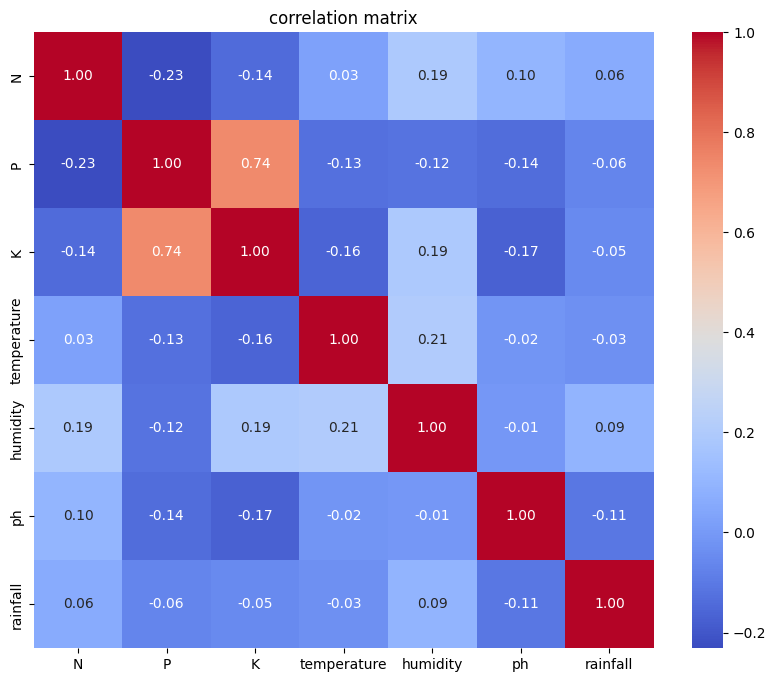

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.heatmap(set1,annot=True,fmt='.2f',cmap = 'coolwarm')
plt.title('correlation matrix')

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
features = data1.select_dtypes(include=[float, int]).columns
target = 'Crop'

In [ ]:
# Splitting dataset as features and label
X = data1[features]
y = data1[target]

In [ ]:
acc = []
model = []

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

C:\Users\shjai\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shjai\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shjai\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Saving Trained Decision Tree Model

In [ ]:
import pickle

DT_pkl_filename = r'C:\Users\shjai\OneDrive\Desktop\Shreyansh\models\DecisionTree.pkl'
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(DecisionTree, DT_Model_pkl)

# Gausian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [ ]:

DT_pkl_filename = r'C:\Users\shjai\OneDrive\Desktop\Shreyansh\models\NaiveBayes.pkl'
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(NaiveBayes, DT_Model_pkl)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

In [ ]:

DT_pkl_filename = r'C:\Users\shjai\OneDrive\Desktop\Shreyansh\models\RandomForest.pkl'
with open(DT_pkl_filename, 'wb') as DT_Model_pkl:
    pickle.dump(RF, DT_Model_pkl)

C:\Users\shjai\AppData\Local\Temp\ipykernel_18964\2515939826.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Algorithm', data=df, palette='dark')


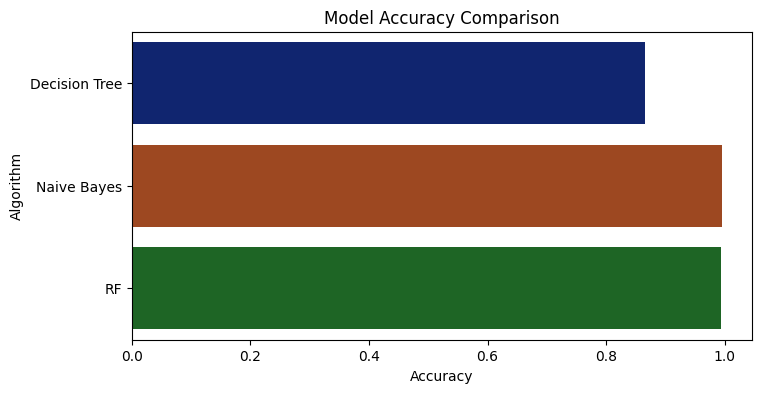

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({
    'Algorithm': model,
    'Accuracy': acc
})

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Accuracy', y='Algorithm', data=df, palette='dark')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Model Accuracy Comparison')
plt.show()